In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
import datetime

In [2]:
cc = pd.read_csv("creditcard.csv")
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
cc["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

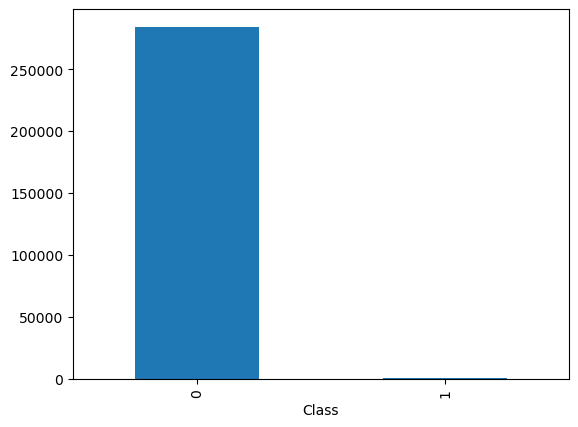

In [10]:
cc["Class"].value_counts().T.plot(kind="bar")

<Axes: >

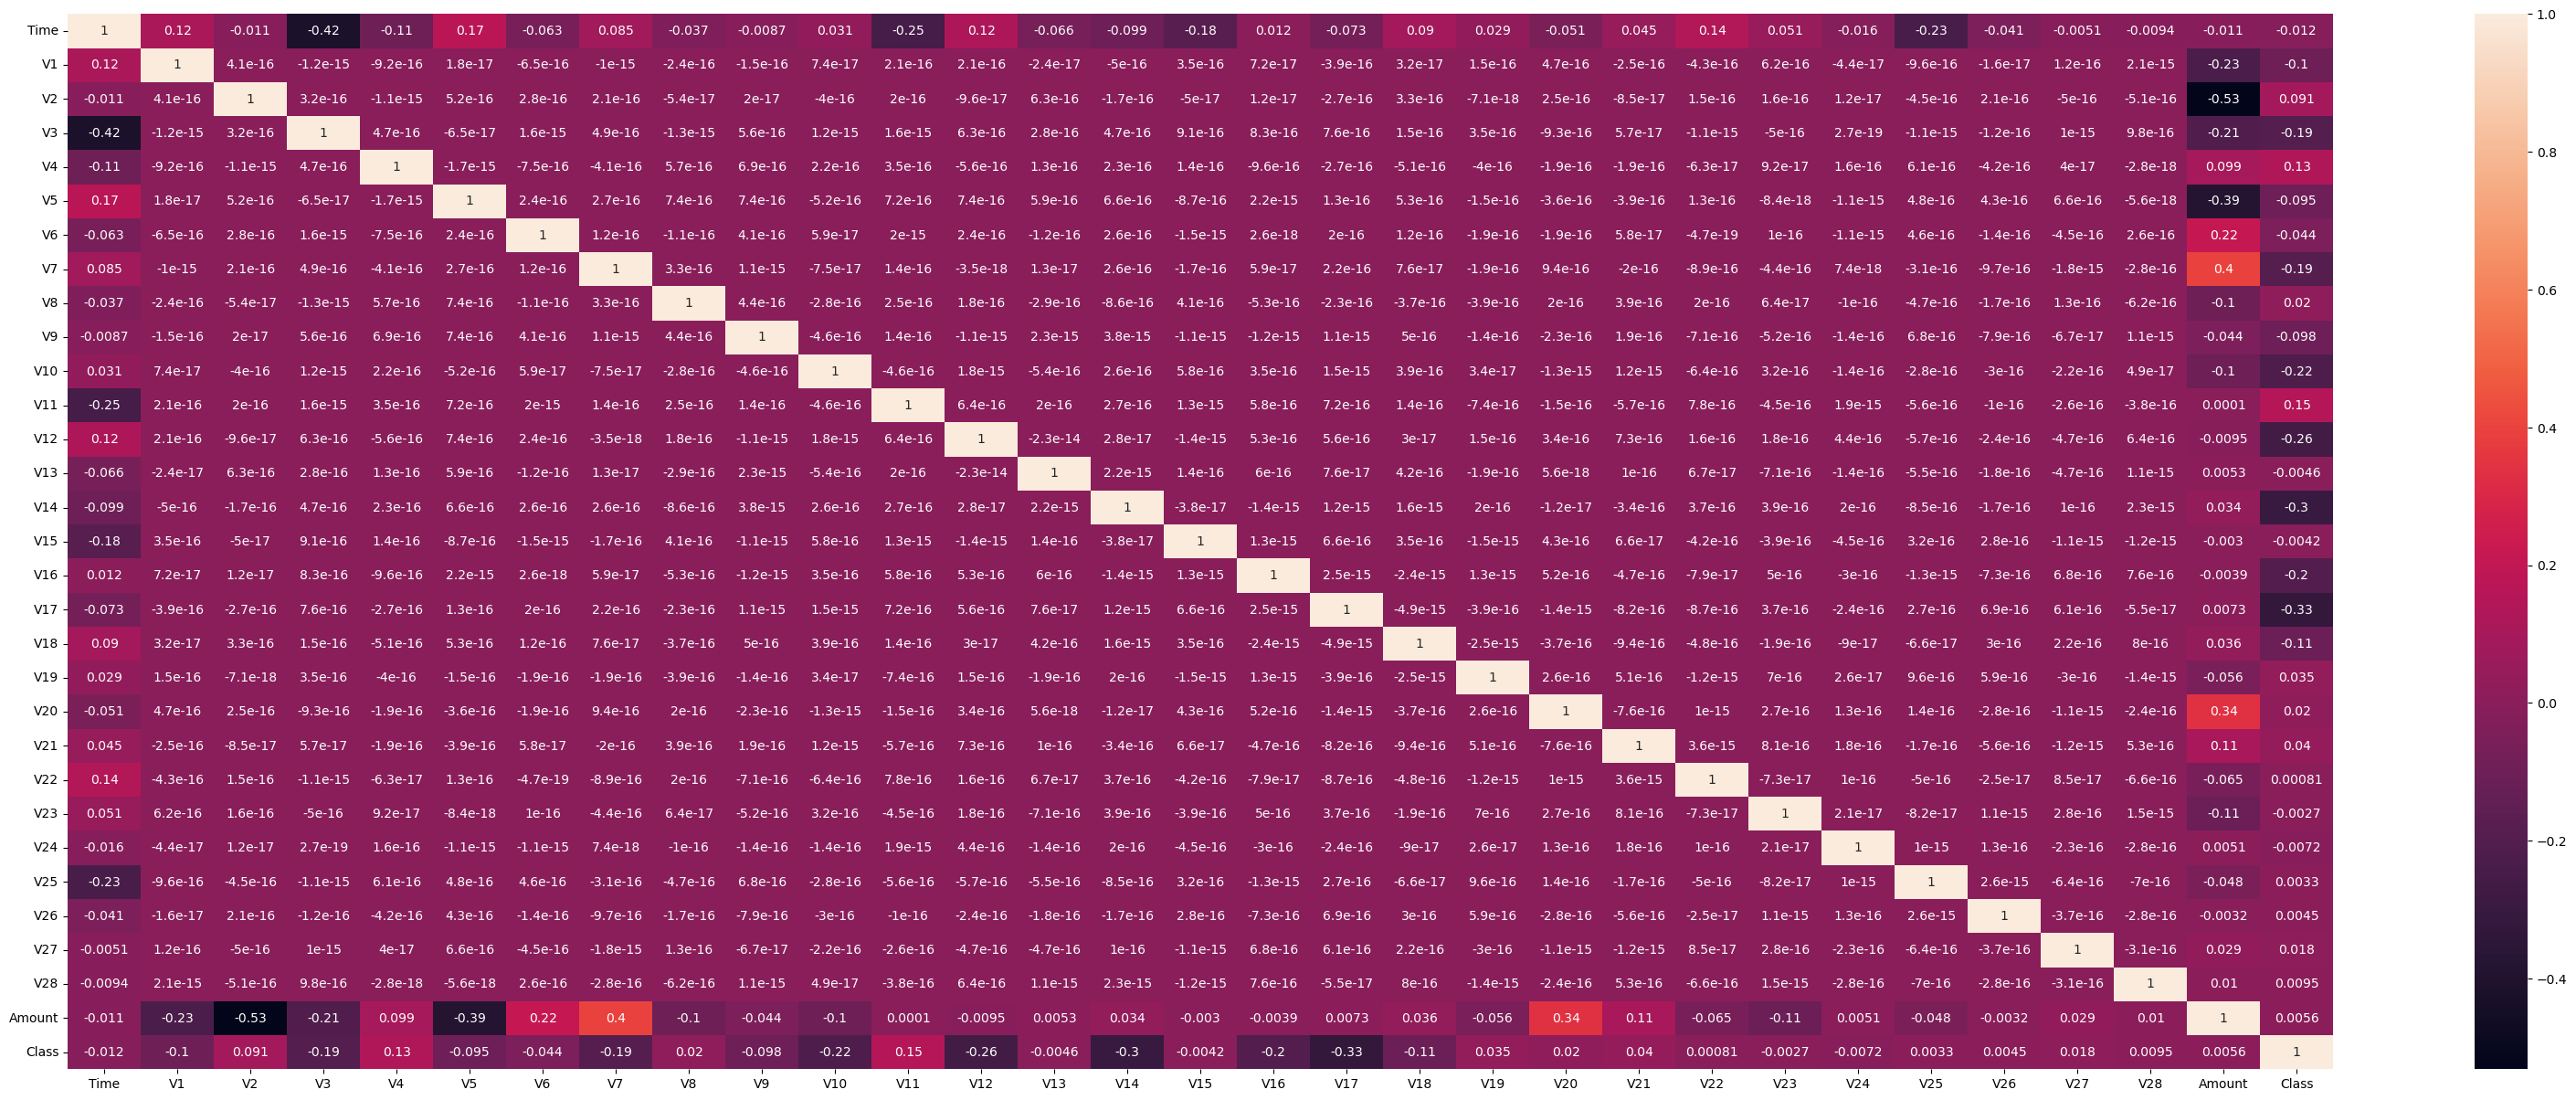

In [12]:
plt.figure(figsize=(40,15))
sns.heatmap(cc.corr(), annot=True)

In [3]:
X = cc.drop("Class", axis=1)
y = cc["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

227845

In [4]:
%%time
model = RandomForestClassifier(n_jobs=-1, max_samples=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

CPU times: total: 26 s
Wall time: 4.03 s


0.9992275552122467

In [29]:
cross_val_score(estimator=model, X=X_test, y=y_test, cv=5, scoring="accuracy").mean()

0.9992275573681653

In [30]:
cross_val_score(estimator=model, X=X_test, y=y_test, cv=5, scoring="precision").mean()

0.8483333333333334

In [31]:
cross_val_score(estimator=model, X=X_test, y=y_test, cv=5, scoring="recall").mean()

0.6231578947368421

In [32]:
cross_val_score(estimator=model, X=X_test, y=y_test, cv=5, scoring="f1").mean()

0.7140978974807497

In [33]:
cross_val_score(estimator=model, X=X, y=y, cv=5, scoring="accuracy").mean()

0.9992135026866361

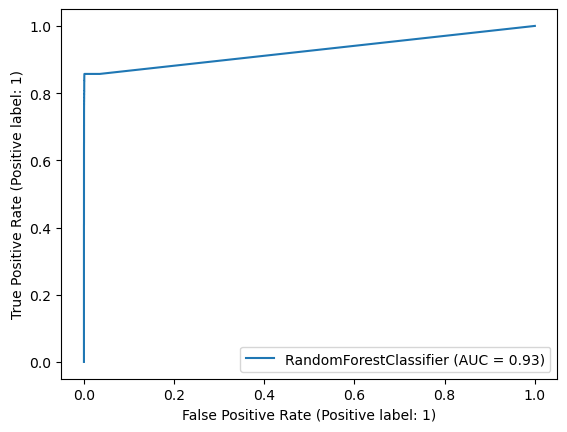

In [13]:
RocCurveDisplay.from_estimator(estimator=model, X=X_test, y=y_test)

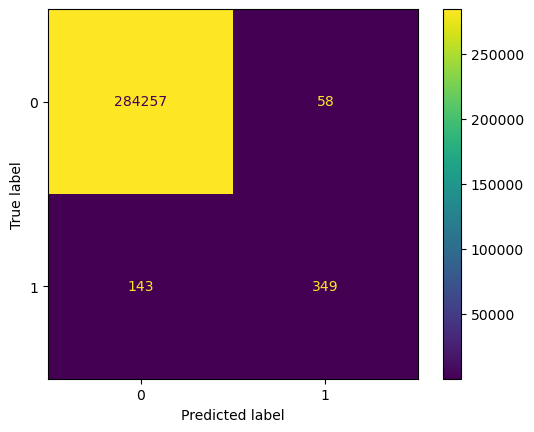

In [20]:
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y)